# Working with Terms and Documents

This first homework assignment starts off with term statistics computations and graphing. In the final section (for CS6200 students), you collect new documents to experiment with.

Read through this Jupyter notebook and fill in the parts marked with `TODO`.

In [1]:
# CS 6200
# Grania Machado

## Sample Data

Start by looking at some sample data. We donwload the counts of terms in documents for the first one million tokens of a newswire collection.

In [2]:
!wget -O ap201001.json.gz https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
!gunzip ap201001.json.gz

--2022-02-09 03:56:28--  https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz [following]
--2022-02-09 03:56:28--  https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz [following]
--2022-02-09 03:56:29--  https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 20

We convert this file with one JSON record on each line to a list of dictionaries.

In [3]:
import json
rawfile = open('ap201001.json')
terms = [json.loads(line) for line in rawfile]

Here are the first ten records, showing the count of each term for each document and field. In this dataset, field only takes the values `body` or `title`.

In [4]:
terms[1:10]

[{'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'about'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'abuse'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'academy'},
 {'count': 2,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'accused'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'actress'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'ad'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'after'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'agenda'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'agreed'}]

Each record has four fields:
* `id`, with the identifier for the document;
* `field`, with the region of the document containing a given term;
* `term`, with the lower-cased term; and
* `count`, with the number of times each term occurred in that field and document.

## Computing Term Statistics


If we look at the most frequent terms for a given document, we mostly see common function words, such as `the`, `and`, and `of`. Start exploring the dataset by computing some of these basic term statistics. You can make your life easier using data frame libraries such as `pandas`, core python libraries such as `collections`, or just simple list comprehensions.

Feel free to define helper functions in your code before computing the statistics we're looking for.

In [5]:
# TODO: Print the 6 terms from document APW_ENG_20100101.0001 with the highest count.

from itertools import groupby
from operator import itemgetter

found_value = []
for t in terms:
  if t["id"] == "APW_ENG_20100101.0001":
    found_value.append(t)
# print(len(found_value))

grouper = itemgetter("id", "term")
result = []
for key, grp in groupby(sorted(found_value, key = grouper), grouper):
    temp_dict = dict(zip(["id", "term"], key))
    temp_dict["count"] = sum(item["count"] for item in grp)
    result.append(temp_dict)

sorted_list = sorted(result, key=itemgetter('count'),reverse = True)

In [6]:
sorted_list[:6]

[{'count': 16, 'id': 'APW_ENG_20100101.0001', 'term': 'a'},
 {'count': 11, 'id': 'APW_ENG_20100101.0001', 'term': 'the'},
 {'count': 10, 'id': 'APW_ENG_20100101.0001', 'term': 'and'},
 {'count': 10, 'id': 'APW_ENG_20100101.0001', 'term': 'brooks'},
 {'count': 10, 'id': 'APW_ENG_20100101.0001', 'term': 'of'},
 {'count': 10, 'id': 'APW_ENG_20100101.0001', 'term': 'to'}]

In [7]:
# TODO: Print the 10 terms from all fields of document APW_ENG_20100102.0077 with the highest count.

from itertools import groupby
from operator import itemgetter

found_value = []
for t in terms:
  if t["id"] == "APW_ENG_20100102.0077":
    found_value.append(t)

grouper = itemgetter("id", "term")
result = []
for key, grp in groupby(sorted(found_value, key = grouper), grouper):
    temp_dict = dict(zip(["id", "term"], key))
    temp_dict["count"] = sum(item["count"] for item in grp)
    result.append(temp_dict)

sorted_list = sorted(result, key=itemgetter('count'),reverse = True)

In [8]:
sorted_list[:10]

[{'count': 50, 'id': 'APW_ENG_20100102.0077', 'term': 'the'},
 {'count': 22, 'id': 'APW_ENG_20100102.0077', 'term': 'to'},
 {'count': 21, 'id': 'APW_ENG_20100102.0077', 'term': 'in'},
 {'count': 19, 'id': 'APW_ENG_20100102.0077', 'term': 'and'},
 {'count': 14, 'id': 'APW_ENG_20100102.0077', 'term': 'a'},
 {'count': 14, 'id': 'APW_ENG_20100102.0077', 'term': 'of'},
 {'count': 8, 'id': 'APW_ENG_20100102.0077', 'term': 'militants'},
 {'count': 8, 'id': 'APW_ENG_20100102.0077', 'term': 'on'},
 {'count': 8, 'id': 'APW_ENG_20100102.0077', 'term': 'said'},
 {'count': 8, 'id': 'APW_ENG_20100102.0077', 'term': 'was'}]

In [9]:
# TODO: Print the 10 terms with the highest total count in the corpus.

# import pandas as pd
# import duckdb
# df = pd.DataFrame(terms)
# result = duckdb.query("""
#     SELECT term, SUM(count)
#     FROM df
#     GROUP BY term
#     ORDER BY SUM(count) DESC;;
# """).to_df()

from itertools import groupby
from operator import itemgetter

grouper = itemgetter("term")
result = []
for key, grp in groupby(sorted(terms, key = grouper), grouper):
  if not isinstance(key, tuple):
    key = [key]
    temp_dict = dict(zip(["term"], key))
    temp_dict["count"] = sum(item["count"] for item in grp)
    result.append(temp_dict)

#print(result)
sorted_list = sorted(result, key=itemgetter('count'),reverse = True)
#len(sorted_list)

In [10]:
sorted_list[:10]

[{'count': 62216, 'term': 'the'},
 {'count': 26931, 'term': 'to'},
 {'count': 25659, 'term': 'in'},
 {'count': 23383, 'term': 'a'},
 {'count': 22326, 'term': 'of'},
 {'count': 22125, 'term': 'and'},
 {'count': 10888, 'term': 'said'},
 {'count': 9716, 'term': 'for'},
 {'count': 9382, 'term': 'on'},
 {'count': 8942, 'term': 'that'}]

Raw counts may not be the most informative statistic. One common improvement is to use *inverse document frequency*, the inverse of the proportion of documents that contain a given term.

In [11]:
# TODO: Compute the number of distinct documents in the collection.

from itertools import groupby
from operator import itemgetter

grouper = itemgetter("id")
documents = []
for key, grp in groupby(sorted(terms, key = grouper), grouper):
  if not isinstance(key, tuple):
    key = [key]
    temp_dict = dict(zip(["id"], key))
    for v in temp_dict.values():
      k1 = v
    documents.append(k1)

N = len(documents)
print("N = ",N)

# TODO: Compute the number of distinct documents each term appears in
# and store in a dictionary.

# import pandas as pd
# import duckdb
# df = pd.DataFrame(terms)
# result2 = duckdb.query("""
#     SELECT term, COUNT(id)
#     FROM df
#     GROUP BY term;
# """).to_df()
# print(result2)

from itertools import groupby
from operator import itemgetter
df = dict()
grouper = itemgetter("term")
result1 = []
for key, grp in groupby(sorted(terms, key = grouper), grouper):
  if not isinstance(key, tuple):
    key = [key]
    temp_dict = dict(zip(["term"], key))
    temp_dict["id"] = len(set(item["id"] for item in grp))
    val = []
    for v in temp_dict.values():
      val.append(v)
    k1 = val[0]
    k2 = val[1]
    df[k1] = k2

# print(len(df))

N =  2778


In [12]:
list(df.items())[:5]

[('a', 2571), ('aaaar', 1), ('aafter', 1), ('aamir', 2), ('aardvarks', 1)]

In [13]:
# TODO: Print the relative document frequency of 'the',
# i.e., the number of documents that contain 'the' divided by N.
print('Relative document frequency of the =',df['the']/N)

Relative document frequency of the = 0.9704823614110871


Empricially, we usually see better retrieval results if we rescale term frequency (within documents) and inverse document frequency (across documents) with the log function. Let the `tfidf` of term _t_ in document _d_ be:
```
tfidf(t, d) = log(count(t, d) + 1) * log(N / df(t))
```

Later in the course, we will show a probabilistic derivation of this quantity based on smoothing language models.

In [14]:
# TODO: Compute the tf-idf value for each term in each document.
# Take the raw term data and add a tfidf field to each record.
from itertools import groupby
from operator import itemgetter
import numpy as np

tfidf_terms = None

# import pandas as pd
# import duckdb
# df = pd.DataFrame(terms)
# result2 = duckdb.query("""
#     SELECT id, SUM(count)
#     FROM df
#     GROUP BY id;
# """).to_df()
# print(result2)

grouper = itemgetter("id", "term")
term_doc = []

for key, grp in groupby(sorted(terms, key = grouper), grouper):
    temp_dict = dict(zip(["id", "term"], key))
    temp_dict["count"] = sum(item["count"] for item in grp)
    count_td = temp_dict["count"]
    term_val = temp_dict["term"]
    term_1 = np.log(count_td + 1)
    term_2 = np.log(N / df[term_val])
    tfidf = term_1 * term_2
    temp_dict["tfidf"] = tfidf
    term_doc.append(temp_dict)

sorted_td = sorted(term_doc, key=itemgetter('count'),reverse = True)

In [15]:
# TODO: Print the 20 term-document pairs with the highest tf-idf values.
sorted_td[:20]

[{'count': 149,
  'id': 'APW_ENG_20100107.0183',
  'term': 'the',
  'tfidf': 0.15012891163756908},
 {'count': 104,
  'id': 'APW_ENG_20100107.0114',
  'term': 'the',
  'tfidf': 0.13944219867623972},
 {'count': 102,
  'id': 'APW_ENG_20100106.0834',
  'term': 'the',
  'tfidf': 0.1388659876239319},
 {'count': 102,
  'id': 'APW_ENG_20100106.0839',
  'term': 'the',
  'tfidf': 0.1388659876239319},
 {'count': 102,
  'id': 'APW_ENG_20100106.0913',
  'term': 'the',
  'tfidf': 0.1388659876239319},
 {'count': 102,
  'id': 'APW_ENG_20100106.0915',
  'term': 'the',
  'tfidf': 0.1388659876239319},
 {'count': 102,
  'id': 'APW_ENG_20100106.1032',
  'term': 'the',
  'tfidf': 0.1388659876239319},
 {'count': 102,
  'id': 'APW_ENG_20100106.1037',
  'term': 'the',
  'tfidf': 0.1388659876239319},
 {'count': 101,
  'id': 'APW_ENG_20100104.0648',
  'term': 'the',
  'tfidf': 0.1385736726099018},
 {'count': 101,
  'id': 'APW_ENG_20100104.0660',
  'term': 'the',
  'tfidf': 0.1385736726099018},
 {'count': 101,
  

## Plotting Term Distributions

Besides frequencies and tf-idf values within documents, it is often helpful to look at the distrubitions of word frequencies in the whole collection. In class, we talk about the Zipf distribution of word rank versus frequency and Heaps' Law relating the number of distinct words to the number of tokens.

We might examine these distributions to see, for instance, if an unexpectedly large number of very rare terms occurs, which might indicate noise added to our data.

In [16]:
# TODO: Compute a list of the distinct words in this collection and sort it in descending order of frequency.
# Thus frequency[0] should contain the word "the" and the count 62216.
from itertools import groupby
from operator import itemgetter

grouper = itemgetter("term")
frequency = []
for key, grp in groupby(sorted(terms, key = grouper), grouper):
  if not isinstance(key, tuple):
    key = [key]
    temp_dict = dict(zip(["term"], key))
    temp_dict["count"] = sum(item["count"] for item in grp)
    frequency.append(temp_dict)

frequency = sorted(frequency, key=itemgetter('count'),reverse = True)
#print(len(frequency))
print(frequency[0])

{'term': 'the', 'count': 62216}


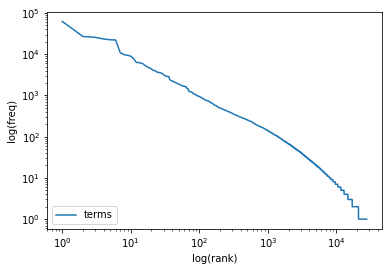

In [17]:
# TODO: Plot a graph of the log of the rank (starting at 1) on the x-axis,
# against the log of the frequency on the y-axis. You may use the matplotlib
# or other library.

from matplotlib import pylab

n = len(frequency)
ranks = range(1, n+1)                         # x-axis : ranks
key_val = "count"
freqs = [freq[key_val] for freq in frequency] # y-axis: frequency
pylab.loglog(ranks, freqs, label='terms')
pylab.xlabel('log(rank)')
pylab.ylabel('log(freq)')
pylab.legend(loc='lower left')
pylab.show()

In [18]:
# TODO: Compute the number of tokens in the corpus.
# Remember to count each occurrence of each word. For instance, the 62,216
# instances of "the" will all count here.

ntokens = sum(freqs)
print('Number of tokens in the corpus =',ntokens)

Number of tokens in the corpus = 1000000


In [19]:
# TODO: Compute the proportion of tokens made up by the top 10 most
# frequent words.

top_10_freqs = [freq[key_val] for freq in frequency[:10]]
#print(top_10_freqs)
top_10_proportion = 100 * float(sum(top_10_freqs))/float(ntokens)
print('Proportion of tokens made up by the top 10 most frequent words =',str(top_10_proportion) + "%")

Proportion of tokens made up by the top 10 most frequent words = 22.1568%


In [20]:
# TODO: Compute the proportion of tokens made up by the words that occur
# exactly once in this collection.

freqs_1 = []
for freq in frequency:
  if freq[key_val] == 1:
    freqs_1.append(freq[key_val])
#print(freqs_1)
proportion_1 = 100 * float(sum(freqs_1))/float(ntokens)
print('Proportion of tokens made up by the words that occur exactly once =',str(proportion_1) + "%")

Proportion of tokens made up by the words that occur exactly once = 0.6641%


## Acquiring New Documents (for CS6200)

For this assignment so far, you've worked with data that's already been extracted, tokenized, and counted. In this final section, you'll briefly explore acquiring new data.

Find a collection of documents that you're interested in. For the statistics to be meaningful, this collection should have at least 1,000 words.

The format could be anything you can extract text from: HTML, PDF, MS PowerPoint, chat logs, etc.

The collection should be in a natural language, not mostly code or numerical data. It could be in English or in any other language.

The final project for this course will involve designing an information retrieval task on some dataset. You could use this exercise to think about what kind of data you might be interested in, although that is not required.

**TODO**: Write code to download and extract the text from the collection. Describe choices you make about what contents to keep.

In [21]:
# TODO: Data acquisition code here.

## I downloaded an ebook from html page and extracted text from it. 
## To clean raw data, I remove all special characters. 
## Now, I have a corpus of words from which I will obtain meaningful statistics.

url = 'https://www.gutenberg.org/files/31516/31516-h/31516-h.htm'

import requests
from bs4 import BeautifulSoup

r = requests.get(url)
html = r.text
soup = BeautifulSoup(html, "html5lib")
text = soup.get_text()
# print(text)

special_characters = ['!','"','#','$','%','&','(',')','*','+','/',':',';','<','=','>','@','[','\\',']','^','`','{','|','}','~','\t']
for i in special_characters:
  text = text.replace(i, "")

**TODO**: Write code to tokenize the text and count the resulting terms in each document. Describe your tokenization approach here.

Each term may also be associated with a field, such as `body` and `title` in the newswire collection above. Describe the different fields in your data.

In [22]:
# TODO: Tokenization code here.

## For tokenization, I use '\w+' to find tokens in corpus which will match 
## arbitrary sequences of alphanumeric characters and underscores.
## For tokens, I convert them all to lowercase to analyze them better.
## Next, I categorize words into fields like important, general and stopword.
## This can be used to find important words in document, and then k-means
## can be used to categorize words in document.

import re

tokens = re.findall("[\w']+", text)
words = []
for word in tokens:
    words.append(word.lower())

listdict = []
for val in tokens:
  mydict = {}
  mydict['term'] = val
  mydict['count'] = 1
  if len(val) > 7:
    mydict['field'] = 'important'
  elif len(val) <= 2:
    mydict['field'] = 'stopword'
  else:
    mydict['field'] = 'general'
  listdict.append(mydict)

from itertools import groupby
from operator import itemgetter

grouper = itemgetter("term")
frequency = []
for key, grp in groupby(sorted(listdict, key = grouper), grouper):
  if not isinstance(key, tuple):
    key = [key]
    temp_dict = dict(zip(["term"], key))
    temp_dict["count"] = sum(item["count"] for item in grp)
    frequency.append(temp_dict)

frequency = sorted(frequency, key=itemgetter('count'),reverse = True)
#print(len(frequency))
print(frequency[0])

{'term': 'the', 'count': 230}


**TODO**: Plot a graph of the log rank against log frequency for your collection, as you did for the sample collection above. What do you observe about the differences between the distributions in these two collections?

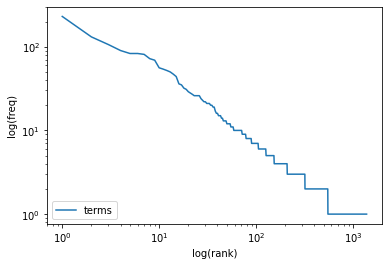

In [23]:
## Above distribution contains a bigger corpus of words and shows a smooth decreasing 
## curve between log of rank vs frequency. This distribution contains a smaller
## corpus of words and shows a non-smooth decreasing line curve 
## between log of rank vs frequency. Also, the frequency count in above 
## distribution is much higher than this distribution.

from matplotlib import pylab

n = len(frequency)
ranks = range(1, n+1)                         # x-axis : ranks
key_val = "count"
freqs = [freq[key_val] for freq in frequency] # y-axis: frequency
pylab.loglog(ranks, freqs, label='terms')
pylab.xlabel('log(rank)')
pylab.ylabel('log(freq)')
pylab.legend(loc='lower left')
pylab.show()